<a href="https://colab.research.google.com/github/ritikkumar01111999/data_science/blob/main/tag_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import warnings

import pickle
import time

import re
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import ToktokTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import hamming_loss
import sklearn.metrics as skm


warnings.filterwarnings("ignore")

In [3]:
from google.colab import files

uploaded = files.upload()

Saving data.csv to data.csv


In [4]:
#data = pd.read_csv("/content/drive/MyDrive/data___/data.csv")
import pandas as pd
data=pd.read_csv('/content/data.csv')

In [5]:
data.head()

,Unnamed: 0,tags,description
0,0,licence-needed supervising-job 5-plus-years-ex...,THE COMPANY Employer is a midstream service...
1,1,2-4-years-experience-needed salary full-time-job,ICR Staffing is now accepting resumes for Indu...
2,2,part-time-job,This is a great position for the right person....
3,3,licence-needed,A large multi-specialty health center is expan...
4,4,5-plus-years-experience-needed full-time-job b...,JOB PURPOSE: The Account Director is respon...


In [6]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
data.head()

,tags,description
0,licence-needed supervising-job 5-plus-years-ex...,THE COMPANY Employer is a midstream service...
1,2-4-years-experience-needed salary full-time-job,ICR Staffing is now accepting resumes for Indu...
2,part-time-job,This is a great position for the right person....
3,licence-needed,A large multi-specialty health center is expan...
4,5-plus-years-experience-needed full-time-job b...,JOB PURPOSE: The Account Director is respon...


In [8]:
data.shape

(4375, 2)

## Checkpoint

In [9]:
df = data.copy()

df.head()

,tags,description
0,licence-needed supervising-job 5-plus-years-ex...,THE COMPANY Employer is a midstream service...
1,2-4-years-experience-needed salary full-time-job,ICR Staffing is now accepting resumes for Indu...
2,part-time-job,This is a great position for the right person....
3,licence-needed,A large multi-specialty health center is expan...
4,5-plus-years-experience-needed full-time-job b...,JOB PURPOSE: The Account Director is respon...


## Data Cleaning

In [10]:
df.isnull().sum()

tags           871
description      0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

tags           0
description    0
dtype: int64

In [13]:
# load stop words
# import nltk
nltk.download('stopwords')
nltk.download('wordnet')
stop_word = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [14]:
def clean(text):
    from nltk.corpus import stopwords

    #     remove urls
    text = re.sub(r'http\S+', " ", text)

    #     remove mentions
    text = re.sub(r'@\w+',' ',text)

    #     remove hastags
    text = re.sub(r'#\w+', ' ', text)

    #     remove digits
    text = re.sub(r'\d+', ' ', text)

    #     remove html tags
    text = re.sub('r<.*?>',' ', text)
    
    #     remove stop words 
    text = text.split()
    text = " ".join([word for word in text if not word in stop_word])
    
      
    return text


In [15]:
df['description'] = df['description'].apply(lambda x: clean(x))

In [16]:
df.head()

,tags,description
0,licence-needed supervising-job 5-plus-years-ex...,THE COMPANY Employer midstream service provide...
1,2-4-years-experience-needed salary full-time-job,ICR Staffing accepting resumes Industrial Main...
2,part-time-job,This great position right person. HEALTHCAREse...
3,licence-needed,A large multi-specialty health center expandin...
4,5-plus-years-experience-needed full-time-job b...,JOB PURPOSE: The Account Director responsible ...


## tags

In [17]:
# split tags in space
df['new_tags'] = df["tags"].apply(lambda x: x.split())

In [18]:
# add all tags
all_tags = [item for sublist in df['new_tags'].values for item in sublist]

In [19]:
len(all_tags)

6880

In [20]:
all_tags

['licence-needed',
 'supervising-job',
 '5-plus-years-experience-needed',
 '2-4-years-experience-needed',
 'salary',
 'full-time-job',
 'part-time-job',
 'licence-needed',
 '5-plus-years-experience-needed',
 'full-time-job',
 'bs-degree-needed',
 'supervising-job',
 'associate-needed',
 '5-plus-years-experience-needed',
 'full-time-job',
 'ms-or-phd-needed',
 '5-plus-years-experience-needed',
 'bs-degree-needed',
 '5-plus-years-experience-needed',
 'bs-degree-needed',
 '2-4-years-experience-needed',
 'full-time-job',
 'hourly-wage',
 'licence-needed',
 '2-4-years-experience-needed',
 'full-time-job',
 'hourly-wage',
 'bs-degree-needed',
 '2-4-years-experience-needed',
 'hourly-wage',
 'bs-degree-needed',
 '2-4-years-experience-needed',
 'full-time-job',
 'salary',
 'bs-degree-needed',
 '2-4-years-experience-needed',
 '5-plus-years-experience-needed',
 'bs-degree-needed',
 'supervising-job',
 '1-year-experience-needed',
 '2-4-years-experience-needed',
 'salary',
 '2-4-years-experience-n

In [21]:
# getting unique set
my_set = set(all_tags)
unique_tags = list(my_set)
len(unique_tags)

12

In [22]:
unique_tags

['1-year-experience-needed',
 'salary',
 'supervising-job',
 '2-4-years-experience-needed',
 'associate-needed',
 'licence-needed',
 'full-time-job',
 'bs-degree-needed',
 'ms-or-phd-needed',
 'hourly-wage',
 '5-plus-years-experience-needed',
 'part-time-job']

In [23]:
# we have all 6800 tag but repeated so after finding unique values we only left with 12 

## Preprocessing

In [24]:
token=ToktokTokenizer()
lemma=WordNetLemmatizer()

def lemitizeWords(text):
    words=token.tokenize(text)
    listLemma=[]
    for w in words:
        x=lemma.lemmatize(w, pos="v")
        listLemma.append(x)
    return ' '.join(map(str, listLemma))

In [25]:
df['description'] = df['description'].apply(
              lambda x: lemitizeWords(x)) 

In [26]:
df['description'].head(10)

0    THE COMPANY Employer midstream service provide...
1    ICR Staffing accept resume Industrial Maintena...
2    This great position right person. HEALTHCAREse...
3    A large multi-specialty health center expand A...
4    JOB PURPOSE : The Account Director responsible...
5    At Cottage Health System , facilities state ar...
6    *E Learning Instructional Designer least + yea...
7    Sales Service Representative SAF-Holland lead ...
8    SAF-Holland , Inc. currently seek Internal Aud...
9    Immediate open full time staff coordinator Hea...
Name: description, dtype: object

## Model Building

In [27]:
df.head()

,tags,description,new_tags
0,licence-needed supervising-job 5-plus-years-ex...,THE COMPANY Employer midstream service provide...,"[licence-needed, supervising-job, 5-plus-years..."
1,2-4-years-experience-needed salary full-time-job,ICR Staffing accept resume Industrial Maintena...,"[2-4-years-experience-needed, salary, full-tim..."
2,part-time-job,This great position right person. HEALTHCAREse...,[part-time-job]
3,licence-needed,A large multi-specialty health center expand A...,[licence-needed]
4,5-plus-years-experience-needed full-time-job b...,JOB PURPOSE : The Account Director responsible...,"[5-plus-years-experience-needed, full-time-job..."


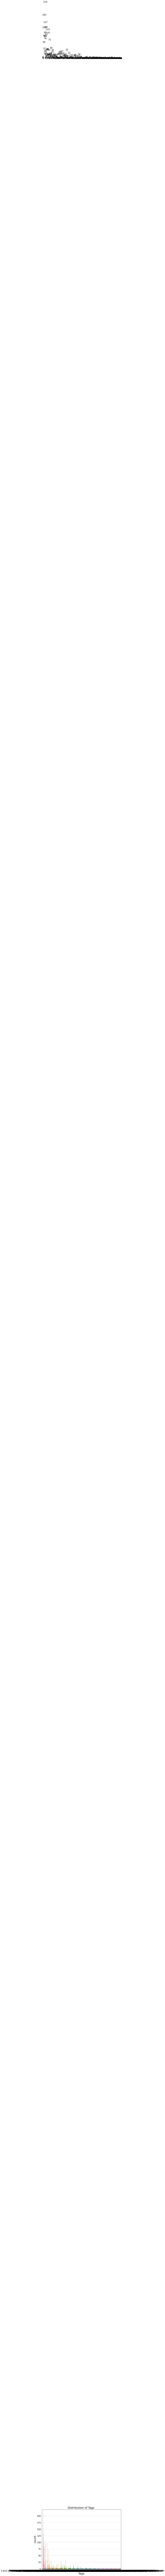

In [28]:
fig = plt.figure(figsize = (8, 6))
axes = fig.add_axes([0.1,0.1,1,1])
axes.set_title("Distribution of Tags ", fontsize = 20)
axes.set_xlabel("Tags", fontsize = 20)
axes.set_ylabel("Count", fontsize = 20)
plt.grid(linestyle='-', linewidth=0.5)
axes.tick_params(labelsize = 15)
sns.countplot(list(data['tags']), ax = axes)
for i in axes.patches:
    axes.text(i.get_x()+0.09, i.get_height()+9500, str(round(i.get_height(), 2)), fontsize=16, color='black')
plt.show()

In [29]:
X = df['description']
y = df['new_tags']

In [30]:
mulitlabel_binarizer = MultiLabelBinarizer()
y_bin = mulitlabel_binarizer.fit_transform(y)

In [31]:
y_bin

array([[0, 0, 1, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [32]:
vectorizer = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       max_features=1000)

In [33]:
X_tf = vectorizer.fit_transform(X)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_tf, y_bin,
                                                    test_size=0.2, random_state=0)


## Model training/ testing

In [35]:
def avg_jacard(y_true,y_pred):
    '''
    see https://en.wikipedia.org/wiki/Multi-label_classification#Statistics_and_evaluation_metrics
    '''
    jacard = np.minimum(y_true,y_pred).sum(axis=1) / np.maximum(y_true,y_pred).sum(axis=1)
    
    return jacard.mean()*100

def print_score(y_pred, clf):
    print("Clf: ", clf.__class__.__name__)
    print("Jacard score: {}".format(avg_jacard(y_test, y_pred)))
    print("Hamming loss: {}".format(hamming_loss(y_pred, y_test)*100))
    print("---")    

In [36]:
def a():
  dummy = DummyClassifier()
  sgd = SGDClassifier()
  lr = LogisticRegression()
  mn = MultinomialNB()
  svc = LinearSVC()
  perceptron = Perceptron()
  pac = PassiveAggressiveClassifier()

  for classifier in [dummy, sgd, lr, mn, svc, perceptron, pac]:
      clf = OneVsRestClassifier(classifier)
      clf.fit(X_train, y_train)
      y_pred = clf.predict(X_test)
      print_score(y_pred, classifier)
      ax=sns.distplot(y_pred)
      ax.set(xlabel="Jacard score", ylabel = "Hamming loss")

In [37]:
from sklearn.tree import plot_tree
def b():
  rfc = RandomForestClassifier()
  rfc.fit(X_train, y_train)
  rfc1=rfc.fit(X_train, y_train)
  y_pred = rfc.predict(X_test)

  print_score(y_pred, rfc)
  #sns.distplot(y_pred)
  fig = plt.figure(figsize=(15, 10))
  plot_tree(rfc1.estimators_[0], 
           
          filled=True, impurity=True, 
          rounded=True)

## Hyperparameter tuning

In [38]:
param_grid = {'estimator__C':[1,10,100,1000]}

svc = OneVsRestClassifier(LinearSVC())
CV_svc = model_selection.GridSearchCV(estimator=svc, 
                                      param_grid=param_grid, cv= 5, 
                                      verbose=10 )
CV_svc.fit(X_train, y_train)
#scoring=make_scorer(avg_jacard,greater_is_better=True)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] estimator__C=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... estimator__C=1, score=0.160, total=   0.3s
[CV] estimator__C=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ...................... estimator__C=1, score=0.168, total=   0.3s
[CV] estimator__C=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] ...................... estimator__C=1, score=0.157, total=   0.3s
[CV] estimator__C=1 ..................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s


[CV] ...................... estimator__C=1, score=0.180, total=   0.3s
[CV] estimator__C=1 ..................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.2s remaining:    0.0s


[CV] ...................... estimator__C=1, score=0.154, total=   0.3s
[CV] estimator__C=10 .................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.5s remaining:    0.0s


[CV] ..................... estimator__C=10, score=0.103, total=   1.1s
[CV] estimator__C=10 .................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.7s remaining:    0.0s


[CV] ..................... estimator__C=10, score=0.109, total=   1.1s
[CV] estimator__C=10 .................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    3.8s remaining:    0.0s


[CV] ..................... estimator__C=10, score=0.130, total=   1.1s
[CV] estimator__C=10 .................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    4.9s remaining:    0.0s


[CV] ..................... estimator__C=10, score=0.111, total=   1.1s
[CV] estimator__C=10 .................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    6.0s remaining:    0.0s


[CV] ..................... estimator__C=10, score=0.111, total=   1.1s
[CV] estimator__C=100 ................................................
[CV] .................... estimator__C=100, score=0.084, total=   2.5s
[CV] estimator__C=100 ................................................
[CV] .................... estimator__C=100, score=0.087, total=   2.6s
[CV] estimator__C=100 ................................................
[CV] .................... estimator__C=100, score=0.103, total=   2.3s
[CV] estimator__C=100 ................................................
[CV] .................... estimator__C=100, score=0.100, total=   2.5s
[CV] estimator__C=100 ................................................
[CV] .................... estimator__C=100, score=0.084, total=   2.4s
[CV] estimator__C=1000 ...............................................
[CV] ................... estimator__C=1000, score=0.077, total=   2.4s
[CV] estimator__C=1000 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   31.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=OneVsRestClassifier(estimator=LinearSVC(C=1.0,
                                                               class_weight=None,
                                                               dual=True,
                                                               fit_intercept=True,
                                                               intercept_scaling=1,
                                                               loss='squared_hinge',
                                                               max_iter=1000,
                                                               multi_class='ovr',
                                                               penalty='l2',
                                                               random_state=None,
                                                               tol=0.0001,
                                                               verbose=0),
                 

In [39]:
best_model = CV_svc.best_estimator_

best_model

OneVsRestClassifier(estimator=LinearSVC(C=1, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='squared_hinge', max_iter=1000,
                                        multi_class='ovr', penalty='l2',
                                        random_state=None, tol=0.0001,
                                        verbose=0),
                    n_jobs=None)

In [40]:
def c():
  # testing
  y_pred = best_model.predict(X_test)

  print_score(y_pred, best_model)

  #sns.kdeplot(y_pred)
  sns.distplot(y_pred)


In [41]:
def d(): 
  for i in range(y_train.shape[1]):
      print(mulitlabel_binarizer.classes_[i])
      print(confusion_matrix(y_test[:,i], y_pred[:,i]))
      print("")
      
      sns.distplot(y_test[:,i])
      sns.distplot(y_pred[:,i])

## Feature Important

In [42]:
def print_top10(feature_names, clf, class_labels):
    """Prints features with the highest coefficient values, per class"""
    for i, class_label in enumerate(class_labels):
        top10 = np.argsort(clf.coef_[i])[-10:]
        print("--------------------------------------------")
        print("%s: %s" % (class_label,
              " ".join(feature_names[j] for j in top10)))
        print("--------------------------------------------")

In [43]:
feature_names = vectorizer.get_feature_names() 

In [44]:
print_top10(feature_names, best_model,
            mulitlabel_binarizer.classes_)

--------------------------------------------
1-year-experience-needed: shift last update diploma products least apply minimum one year
--------------------------------------------
--------------------------------------------
2-4-years-experience-needed: bank primary four yrs exceed minimum rapidly efficiency two years
--------------------------------------------
--------------------------------------------
5-plus-years-experience-needed: budget ideal risk agencies code complex senior guidance five years
--------------------------------------------
--------------------------------------------
associate-needed: desk relate standards meet education student associate college associates degree
--------------------------------------------
--------------------------------------------
bs-degree-needed: meet field equivalent science responsibilities communications bachelors bs degree bachelor
--------------------------------------------
--------------------------------------------
full-time-job

## Testing

In [45]:
classes = mulitlabel_binarizer.classes_

In [46]:
classes[7]

'licence-needed'

In [47]:
classes

array(['1-year-experience-needed', '2-4-years-experience-needed',
       '5-plus-years-experience-needed', 'associate-needed',
       'bs-degree-needed', 'full-time-job', 'hourly-wage',
       'licence-needed', 'ms-or-phd-needed', 'part-time-job', 'salary',
       'supervising-job'], dtype=object)

In [48]:
# to match index with class name
def print_class(arr):
  for index, value in enumerate(arr):
    if value == 1:
      print(classes[index])   
    

In [49]:
# df['new_tags'][549]

In [50]:
test = """
this job is for driver you'll have to have a bike in order to deliver the products
and also you need a helmat for your safety and need a license and it's also part time
"""

# test = df['description'][549]

# clean
test  = clean(test)

# tfidf
tf = vectorizer.transform([test])

# predict
pred = best_model.predict(tf)[0]
pred = list(pred)

print_class(pred)

# predict the output
# print_class(best_model.predict(tf))

licence-needed
part-time-job


**Graphs**


In [ ]:
dummy = DummyClassifier()
sgd = SGDClassifier()
lr = LogisticRegression()
mn = MultinomialNB()
svc = LinearSVC()
perceptron = Perceptron()
pac = PassiveAggressiveClassifier()

Clf:  PassiveAggressiveClassifier
Jacard score: 11.95570953060254
Hamming loss: 25.439847836424157
---


[Text(0, 0.5, 'Hamming loss'), Text(0.5, 0, 'Jacard score')]

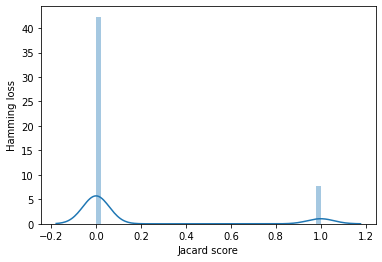

In [61]:
#visulization of Dummy classifier
clf = OneVsRestClassifier(dummy)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print_score(y_pred, classifier)
ax=sns.distplot(y_pred)
ax.set(xlabel="Jacard score", ylabel = "Hamming loss")


Clf:  PassiveAggressiveClassifier
Jacard score: 37.971944840703756
Hamming loss: 13.635282929148834
---


[Text(0, 0.5, 'Hamming loss'), Text(0.5, 0, 'Jacard score')]

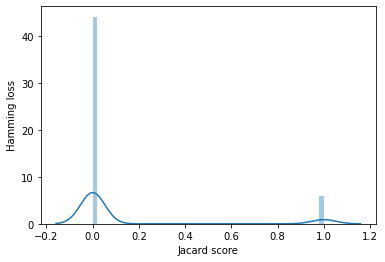

In [71]:
#visulization of SGDClassifier()
clf = OneVsRestClassifier(sgd)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print_score(y_pred, classifier)
ax=sns.distplot(y_pred)
ax.set(xlabel="Jacard score", ylabel = "Hamming loss")

Clf:  PassiveAggressiveClassifier
Jacard score: 23.930099857346647
Hamming loss: 13.801711840228245
---


[Text(0, 0.5, 'Hamming loss'), Text(0.5, 0, 'Jacard score')]

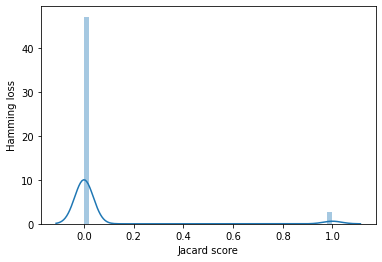

In [63]:
#visulization of linear regression
clf = OneVsRestClassifier(lr)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print_score(y_pred, classifier)
ax=sns.distplot(y_pred)
ax.set(xlabel="Jacard score", ylabel = "Hamming loss")

Clf:  PassiveAggressiveClassifier
Jacard score: 16.89966714217784
Hamming loss: 15.121255349500714
---


[Text(0, 0.5, 'Hamming loss'), Text(0.5, 0, 'Jacard score')]

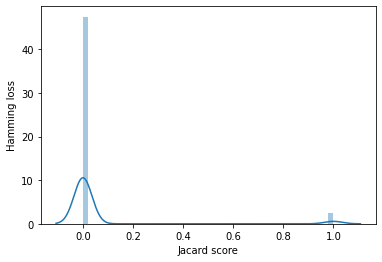

In [68]:
#visulization of MultinomialNB
clf = OneVsRestClassifier(mn)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print_score(y_pred, classifier)
ax=sns.distplot(y_pred)
ax.set(xlabel="Jacard score", ylabel = "Hamming loss")

Clf:  PassiveAggressiveClassifier
Jacard score: 38.649548264384215
Hamming loss: 13.219210651450307
---


[Text(0, 0.5, 'Hamming loss'), Text(0.5, 0, 'Jacard score')]

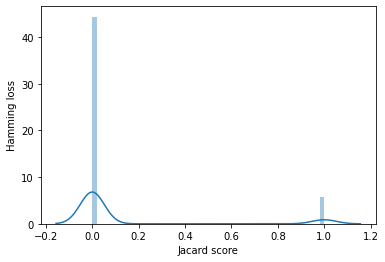

In [67]:
#visulization of LinearSVC
clf = OneVsRestClassifier(svc)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print_score(y_pred, classifier)
ax=sns.distplot(y_pred)
ax.set(xlabel="Jacard score", ylabel = "Hamming loss")

Clf:  PassiveAggressiveClassifier
Jacard score: 33.285102914204195
Hamming loss: 17.85544460294817
---


[Text(0, 0.5, 'Hamming loss'), Text(0.5, 0, 'Jacard score')]

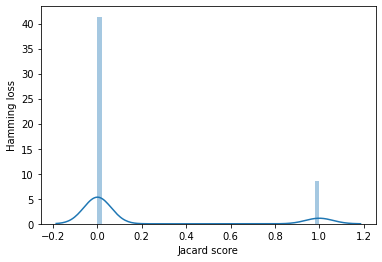

In [69]:
#visulization of Perceptron()

clf = OneVsRestClassifier(perceptron)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print_score(y_pred, classifier)
ax=sns.distplot(y_pred)
ax.set(xlabel="Jacard score", ylabel = "Hamming loss")

Clf:  PassiveAggressiveClassifier
Jacard score: 35.28768426058012
Hamming loss: 17.97432239657632
---


[Text(0, 0.5, 'Hamming loss'), Text(0.5, 0, 'Jacard score')]

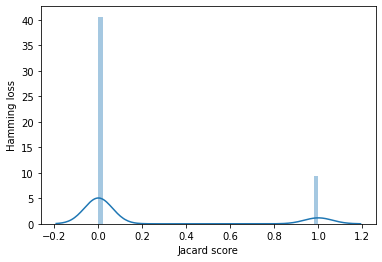

In [70]:
#visulization of PassiveAggressiveClassifier
clf = OneVsRestClassifier(pac)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print_score(y_pred, classifier)
ax=sns.distplot(y_pred)
ax.set(xlabel="Jacard score", ylabel = "Hamming loss")

Clf:  DummyClassifier
Jacard score: 13.425378710685415
Hamming loss: 25.72515454113172
---
Clf:  SGDClassifier
Jacard score: 38.55206847360913
Hamming loss: 13.659058487874464
---
Clf:  LogisticRegression
Jacard score: 23.930099857346647
Hamming loss: 13.801711840228245
---
Clf:  MultinomialNB
Jacard score: 16.89966714217784
Hamming loss: 15.121255349500714
---
Clf:  LinearSVC
Jacard score: 38.649548264384215
Hamming loss: 13.219210651450307
---
Clf:  Perceptron
Jacard score: 33.285102914204195
Hamming loss: 17.85544460294817
---
Clf:  PassiveAggressiveClassifier
Jacard score: 34.7812648597242
Hamming loss: 17.99809795530195
---


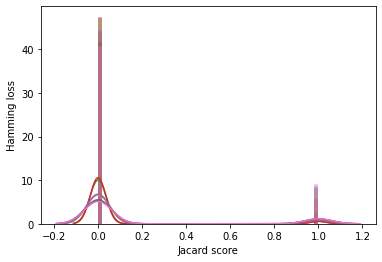

In [51]:
#visulization of compresion of all above algorithm
a()

Clf:  RandomForestClassifier
Jacard score: 17.805515929624345
Hamming loss: 14.21778411792677
---


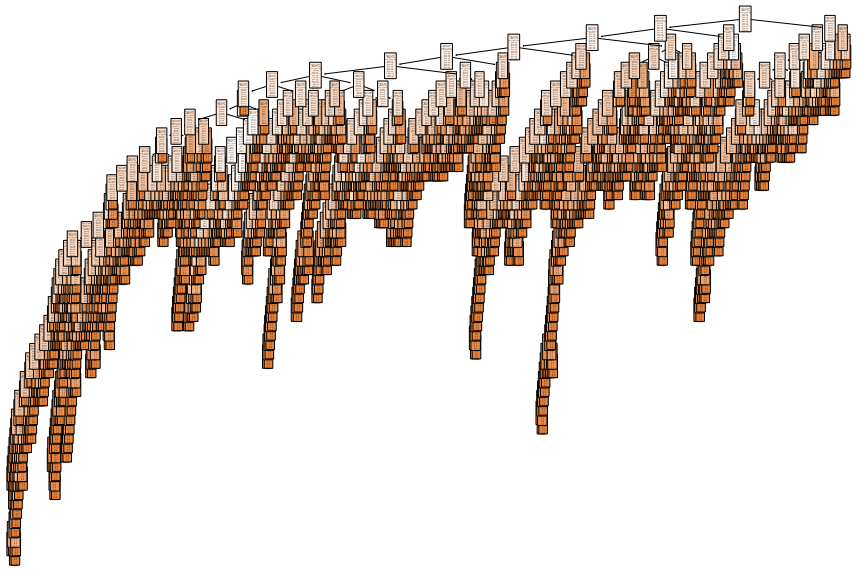

In [52]:
b()

Clf:  OneVsRestClassifier
Jacard score: 38.649548264384215
Hamming loss: 13.219210651450307
---


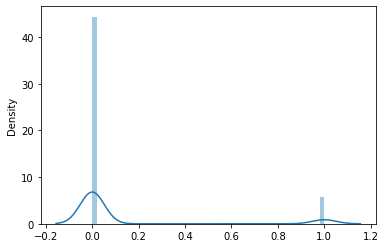

In [53]:
c()